Downloading the data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /kaggle/working/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /kaggle/working/validation-horse-or-human.zip

--2022-09-29 12:04:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 74.125.31.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/kaggle/working/horse-or-human.zip’

/kaggle/working/hor 100%[===================>] 142.65M  59.8MB/s    in 2.4s    

2022-09-29 12:04:09 (59.8 MB/s) - ‘/kaggle/working/horse-or-human.zip’ saved [149574867/149574867]

--2022-09-29 12:04:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting res

In [ ]:
!pip3 install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 2.5 MB/s eta 0:00:00a 0:00:01


Creating New folders

In [ ]:
!mkdir -p /kaggle/working/training
!mkdir -p /kaggle/working/validation

In [ ]:
import os
import zipfile
from sklearn.model_selection import train_test_split
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from tensorflow.keras.optimizers import Adam

import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_soft_device_placement(True)

Num GPUs Available:  1


2022-09-29 12:04:32.683087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 12:04:32.787266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-29 12:04:32.788058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Extracting all the files from zipfolder

In [ ]:
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./training')
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./training/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./training/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('./validation/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('./validation/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse26-6.png', 'horse11-4.png', 'horse13-4.png', 'horse37-4.png', 'horse33-7.png', 'horse29-9.png', 'horse28-4.png', 'horse04-5.png', 'horse47-5.png', 'horse22-4.png']
['human17-13.png', 'human09-24.png', 'human13-08.png', 'human07-22.png', 'human02-15.png', 'human02-28.png', 'human14-29.png', 'human08-18.png', 'human14-07.png', 'human09-05.png']
['horse5-235.png', 'horse5-103.png', 'horse5-565.png', 'horse5-259.png', 'horse4-345.png', 'horse5-275.png', 'horse2-040.png', 'horse2-136.png', 'horse4-548.png', 'horse5-203.png']
['valhuman02-17.png', 'valhuman02-19.png', 'valhuman01-17.png', 'valhuman04-13.png', 'valhuman05-11.png', 'valhuman05-24.png', 'valhuman02-08.png', 'valhuman04-12.png', 'valhuman05-19.png', 'valhuman05-25.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Moving some of the files from validtion to training as only 10% is sufficient for validation

In [ ]:
horsefiles = os.listdir(validation_horse_dir)
humanfiles= os.listdir(validation_human_dir)
valhorses='./validation/horses/'
valhumans='./validation/humans/'

In [ ]:
train_horse, horse_val,train_human, human_val= train_test_split(horsefiles, humanfiles,train_size=0.22)

In [ ]:
for i in range(len(train_horse)):
    shutil.move(valhorses + train_horse[i],train_horse_dir+'/' + train_horse[i])
    
for i in range(len(train_human)):
    shutil.move(valhumans + train_human[i],train_human_dir+'/' + train_human[i])

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 528
total training human images: 555
total validation horse images: 100
total validation human images: 100


In [ ]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

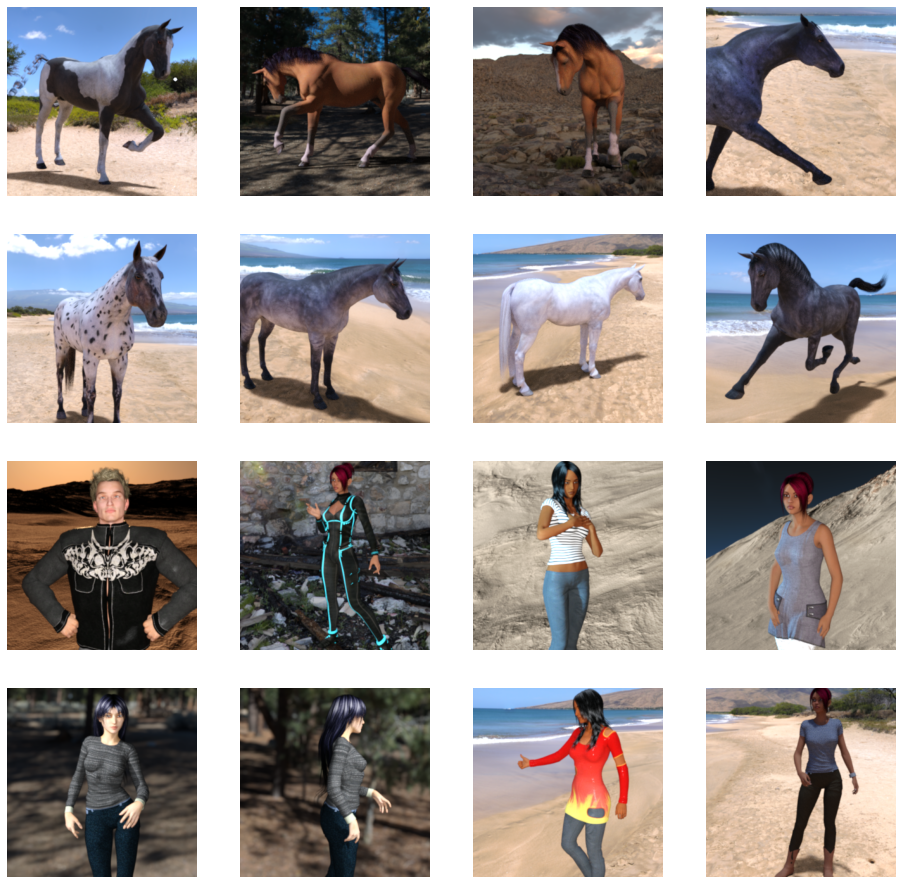

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Custom Callback to save after certain epochs

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (epoch>1 and epoch%10 == 0): # or save after some epoch, each k-th epoch etc.
        print("\nSaving Model at {} epoch".format(epoch))
        self.model.save("./model_{}.h5".format(epoch))
        self.model.save('./model_{}.pth'.format(epoch))

The CNN model

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling1'),
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same',name = 'Conv1'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling2'),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',name = 'Conv2'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling3'),
    #tf.keras.layers.BatchNormalization(name = 'BatchNorm2'),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',name = 'Conv3'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling4'),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',name = 'Conv4'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling5'),
    tf.keras.layers.Dropout(0.2),
    
    # The sixth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same',name = 'Conv5'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name = 'pooling6'),
    
    # Flatten the results to feed into a DNN
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
pooling1 (MaxPooling2D)      (None, 149, 149, 16)      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 149, 149, 32)      4640      
_________________________________________________________________
pooling2 (MaxPooling2D)      (None, 74, 74, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 74, 74, 64)        18496     
_________________________________________________________________
pooling3 (MaxPooling2D)      (None, 37, 37, 64)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 37, 37, 64)       

In [ ]:
from PIL import ImageFont
font = ImageFont.truetype("../input/arialttf-font/arial.ttf", 32)

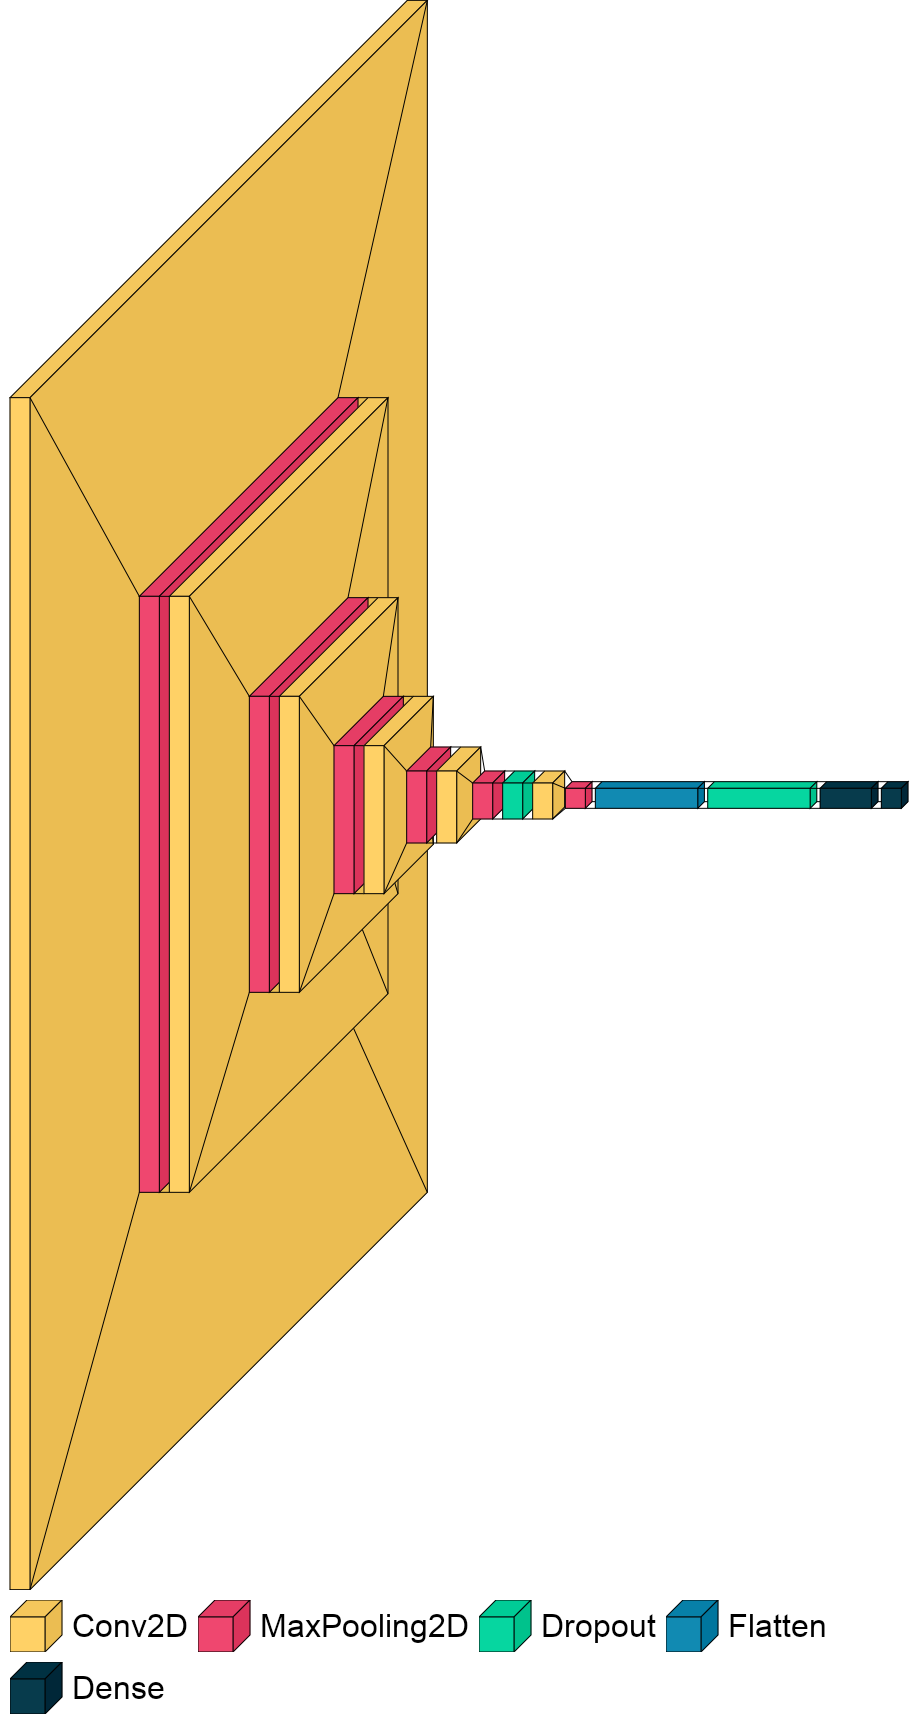

In [ ]:
visualkeras.layered_view(model, legend=True,font=font)

Compiling the model setting the image augmentation and all the other info in the generator

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './training',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = validation_datagen.flow_from_directory(
        './validation',  # This is the source directory for training images
        target_size=(300, 300),  
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

saver = myCallback()

Found 1083 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
label_map = (train_generator.class_indices)
print(label_map)

{'horses': 0, 'humans': 1}


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=(1083/128) ,  # 1083 images = batch_size * steps
      epochs=102,
      validation_data=validation_generator,
      validation_steps=(200/32) ,  # 200 images = batch_size * steps
      verbose=1,
      callbacks=[saver])

2022-09-29 12:05:58.133036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/102


2022-09-29 12:06:03.195967: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 34s 3s/step - loss: 0.6945 - accuracy: 0.5088 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 2/102
8/8 [==============================] - 27s 3s/step - loss: 0.6779 - accuracy: 0.6030 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 3/102
8/8 [==============================] - 27s 3s/step - loss: 0.6335 - accuracy: 0.6528 - val_loss: 0.6614 - val_accuracy: 0.6300
Epoch 4/102
8/8 [==============================] - 28s 4s/step - loss: 0.5951 - accuracy: 0.7008 - val_loss: 0.7018 - val_accuracy: 0.5050
Epoch 5/102
8/8 [==============================] - 28s 3s/step - loss: 0.5462 - accuracy: 0.7331 - val_loss: 0.8614 - val_accuracy: 0.6200
Epoch 6/102
8/8 [==============================] - 28s 3s/step - loss: 0.4813 - accuracy: 0.7655 - val_loss: 0.5883 - val_accuracy: 0.7950
Epoch 7/102
8/8 [==============================] - 27s 3s/step - loss: 0.4380 - accuracy: 0.8024 - val_loss: 0.6415 - val_accuracy: 0.7300
Epoch 8/102
8/8 [======================

2022-09-29 12:11:07.874248: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 12/102
8/8 [==============================] - 28s 3s/step - loss: 0.2335 - accuracy: 0.9169 - val_loss: 0.1753 - val_accuracy: 0.9450
Epoch 13/102
8/8 [==============================] - 28s 3s/step - loss: 0.1894 - accuracy: 0.9234 - val_loss: 0.6135 - val_accuracy: 0.8450
Epoch 14/102
8/8 [==============================] - 28s 3s/step - loss: 0.2026 - accuracy: 0.9123 - val_loss: 0.6679 - val_accuracy: 0.8550
Epoch 15/102
8/8 [==============================] - 28s 3s/step - loss: 0.1505 - accuracy: 0.9437 - val_loss: 0.7466 - val_accuracy: 0.8450
Epoch 16/102
8/8 [==============================] - 28s 4s/step - loss: 0.1944 - accuracy: 0.9224 - val_loss: 0.6270 - val_accuracy: 0.8300
Epoch 17/102
8/8 [==============================] - 27s 3s/step - loss: 0.1466 - accuracy: 0.9584 - val_loss: 0.8059 - val_accuracy: 0.8650
Epoch 18/102
8/8 [==============================] - 28s 3s/step - loss: 0.1053 - accuracy: 0.9575 - val_loss: 0.5560 - val_accuracy: 0.9000
Epoch 19/102
8/8 [==

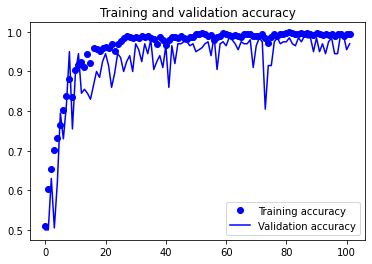

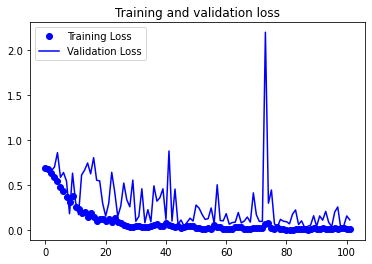

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Visualizing how all the images are passed through the CNN model

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


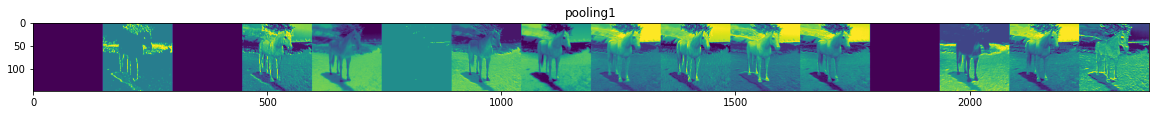

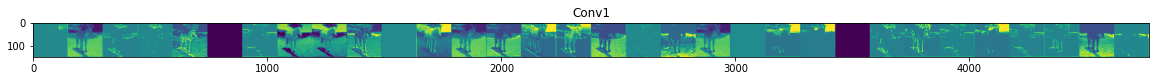

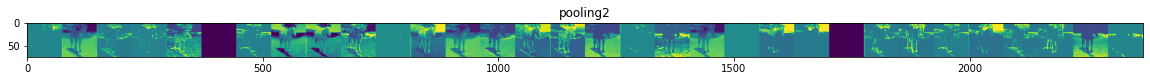

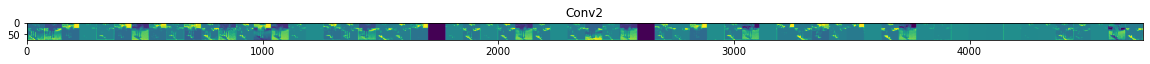

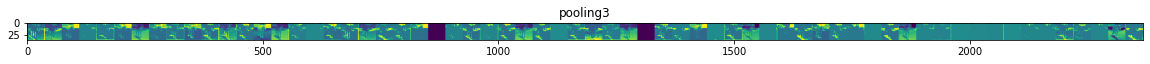

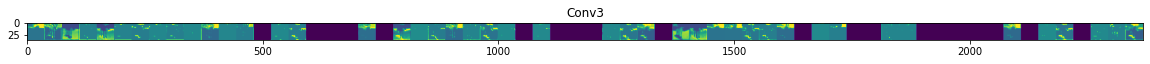

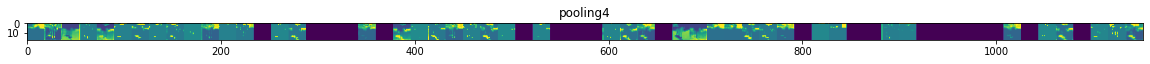

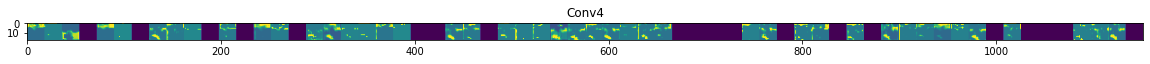

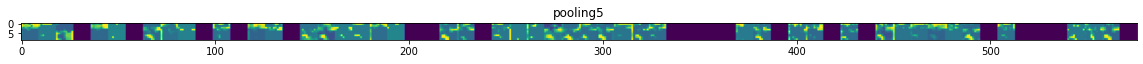

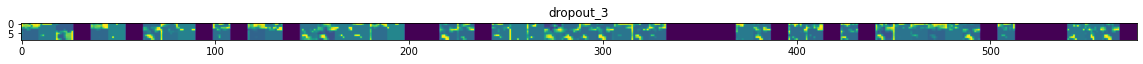

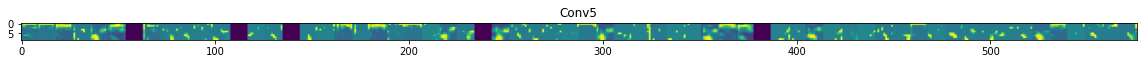

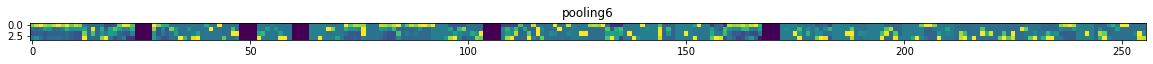

In [ ]:

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')